<a href="https://colab.research.google.com/github/Alexis-SantosP/UTAProjects/blob/main/Data_Augmentation(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

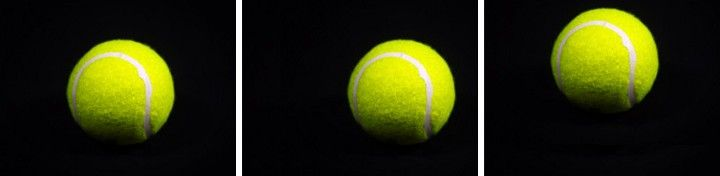



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [1]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

First we upload an image from the internet

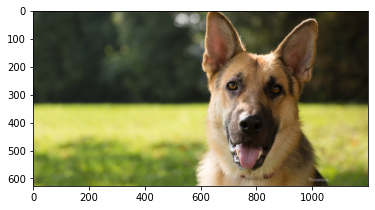

In [2]:
url = 'https://www.pethealthnetwork.com/sites/default/files/content/images/bloat-dogs-156938392.png' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


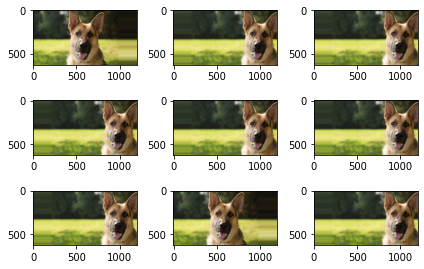

In [5]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

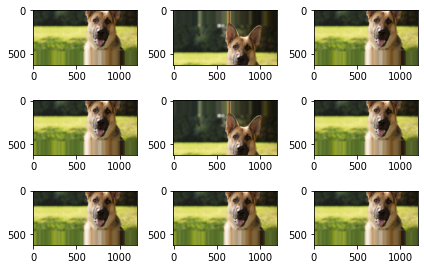

In [7]:
data = img_to_array(img)
samples = expand_dims(data, 0)
 datagen = ImageDataGenerator(height_shift_range=[-150,150])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means reversing the rows or columns of pixels in the case of vertical or horizontal, respectively.
The increase is specified by a boolean argument **horizontal_flip** or **vertical_flip** to the class **ImageDataGenerator**.

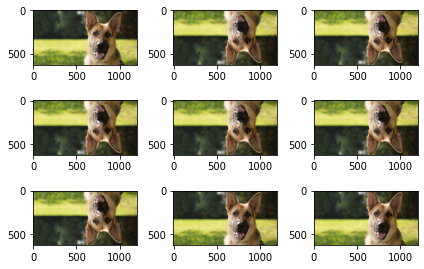

In [8]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

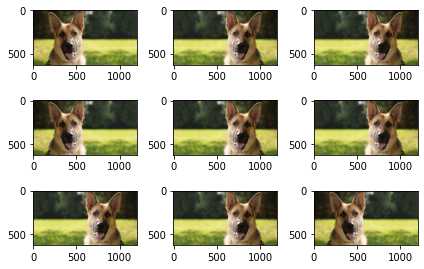

In [9]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The zoom amount is shown uninformly random of the region of zoom for every dimention (high, width) for separated.

Floating or [lower limit, superior limit]. Range for random zoom. If is a floating, [lower limit, superior limit] = [1-zoom_range, 1 + zoom_range]

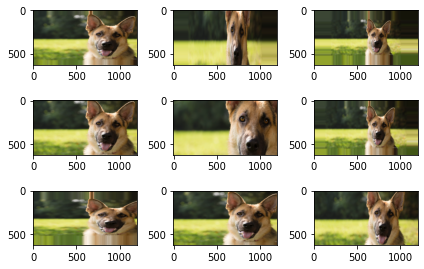

In [11]:
datagen = ImageDataGenerator(zoom_range=0.6) #float o Range [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image rotate in the clock wise direction a determinated number of degrees from 0 to 360. Is probable that rotate pixels out of the image frame and leave areas of frame without pixels data, which need to be completed.

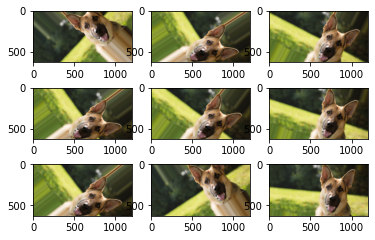

In [12]:
datagen = ImageDataGenerator(rotation_range=75)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

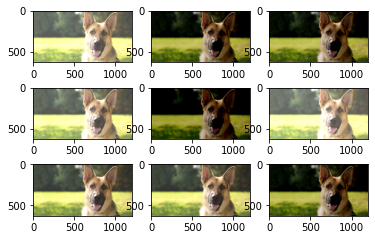

In [16]:
datagen = ImageDataGenerator(channel_shift_range=75)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

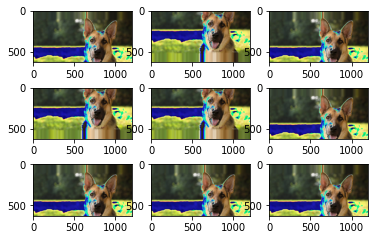

In [27]:
datagen = ImageDataGenerator(rescale=1.2,
                             height_shift_range= [100,100])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The conbination of this tecnics allows us increase the amount of data of dataset to use, as many works the increase of data is used to increase the amount of images of training and improve the presition of the work.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

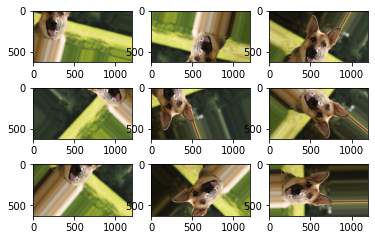

In [14]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [150,150],   
            height_shift_range           = [200,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we will consider words, the needed work is not easy given inherent complexity of language (we can´t replace every word with its synonym and even if we do, there is a risk that the sentence changes completely).
Exist some librarys that can help us to do the task, we will start analyzing the followings:


1.   Text Attack
2.   Google Trans

# TextAttack
Is a framework of Python for adversary attacks, adversary taining and increase of data in NLP. We will focus only in the increase of data.

In [28]:
!pip install textattack

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 245kB 8.7MB/s 
     |████████████████████████████████| 102kB 4.7MB/s 
     |████████████████████████████████| 235kB 10.3MB/s 
     |████████████████████████████████| 3.0MB 13.4MB/s 
     |████████████████████████████████| 778kB 28.0MB/s 
     |████████████████████████████████| 1.7MB 35.0MB/s 
     |████████████████████████████████| 1.1MB 38.2MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 153kB 43.2MB/s 
     |████████████████████████████████| 686kB 36.1MB/s 
     |████████████████████████████████| 317kB 35.6MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 798kB 43.9MB/s 
     |████████████████████████████████| 19.7MB 1.3MB/s 
     |████████████████████████████████| 276kB 45.6MB/s 
     |████████████████████████████████| 1.1MB 44.8MB/s 
     |████████████████████████████████| 983kB 45.9MB/s 

In [29]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 19:24:53 INFO: Downloading default packages for language: en (English)...
2020-10-16 19:28:08 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [37]:
text = "I would like or I wish it does not exist, we can only do the better that we can"

TextAttack provides four methods to increase of data.


## WordNetAugmenter
Increase the text replaced with synonyms of the thesaurus (synonyms dictionary) of WordNet.

WordNet is a base of lexical data of english. Nouns, verbs, adverbs, and adjectives are grouped into sets of cognitive synonyms (synsets), each of wich expresses a different concept.
WordNet superficially resembles a thesaurus, since it group the words according to their meaning.



In [38]:
aug = WordNetAugmenter();
aug.augment(text)

['I would comparable or I wish it does not exist, we can only do the better that we can']


## EmbeddingAugmenter
 Aumenta el texto transformando palabras con sus incrustaciones, con una restricción para garantizar que su similitud de coseno sea de al menos 0,8.


In [39]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:34<00:00, 13.8MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp8hwl2tbu.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['I should like or I wish it does not exist, we can only do the better that we can']

## CharSwapAugmenter
Increase the text replacing, deleting inserting and exchanging adjacent characters.

In [40]:
aug = CharSwapAugmenter()
aug.augment(text)

['I woulcd like or I wish it does not exist, we can only do the better that we can']


## EasyDataAugmenter
This increase the text with a combination of replace of synonyms of Wordnet, deleting of words, changes in the order of words and inserts of synonyms. All of these 4 functions occur randomly.  So we will get different results every time we run the code. This returns 4 increasing results, different of others methods. 


In [41]:
aug = EasyDataAugmenter()
aug.augment(text)

['I would like or I wish it does not exist, we can only do the better that can',
 'I would like or I wish it does not exist, can we only do the better that we can',
 'I would like or care I wish it does not exist, we can only do the better that we can',
 'i would like or I wish it does not exist, we can only do the better that we can']

Googletrans  uses API Ajax of Google Translate to detection and translation of idioms. 

The key parameters for the method **translate ()** are:



1.   **src**: Source language. This parameter is optional because **googletrans** will detect it.
2.   **dest**: Target language. Required parameter.

1.   **text**: The text that will be translated to the source language to target language. Required parameter. 





 



When we use this method happens a retranslation, we pass from source language to target language and return to source language, during this retranslation, we have a little change in the sentence between the original text and the retranslation text, but the main meaning of the sentence conserve. 

Supported languages can be found at https://cloud.google.com/translate/docs/languages?hl=es

To obtain better results is recommended make some tests with the languages, If the target language is so similar to source language the translation do not lost information, however there may be the problem that the translation will be too literal, This become a little a problem of trial and error.


Some examples of languages:


*   Afrikáans	'af'

*   Chinese (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japanese	'ja'
*   Latin	'la'


*   Spanish	'es'


*   Turkmen	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [42]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.7MB/s 
     |████████████████████████████████| 972kB 3.9MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 71kB 3.8MB/s 
     |████████████████████████████████| 102kB 6.4MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=a74d41343557bf91e59346af49f29edeffe8b8016fa323cd1fdc4de29cf133dc
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=cdd9526c1e3f632da44b48bba892f17c9a2be8ccab1464006f316f2d5eef374d
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [43]:
from googletrans import Translator
translator = Translator()

In [44]:
origin_text = "You will fail a hundred of times but it does not matter if you change the things to obtain your goal."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

You will fail a hundred of times but it does not matter if you change the things to obtain your goal.
Uzohluleka izikhathi eziyikhulu kepha akunandaba ukuthi ushintsha izinto ukuthola umgomo wakho.
You will fail a hundred times but it does not matter if you change things to get your goal.


In [45]:
origin_text = "You will fail a hundred of times but it does not matter if you change the things to obtain your goal."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

You will fail a hundred of times but it does not matter if you change the things to obtain your goal.
あなたは何百回も失敗するでしょうが、あなたがあなたの目標を達成するために物事を変えるかどうかは問題ではありません。
You will fail hundreds of times, but it doesn't matter if you change things to reach your goals.


In [46]:
origin_text = "You will fail a hundred of times but it does not matter if you change the things to obtain your goal."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

You will fail a hundred of times but it does not matter if you change the things to obtain your goal.
Uzohluleka izikhathi eziyikhulu kepha akunandaba ukuthi ushintsha izinto ukuthola umgomo wakho.
You will fail a hundred times but it does not matter if you change things to get your goal.
